In [ ]:
#텐서플로우 종속성 추가

import tensorflow as tf
print("TensorFlow version : ", tf.__version__)  #텐서플로우 버전 출력

TensorFlow version :  2.15.0


In [ ]:
# MNIST 데이터셋 불러오기

mnist = tf.keras.datasets.mnist   # MNIST 모듈을 tf.keras.datasets 패키지에서 가져옴

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # MNIST 데이터셋 로드
x_train, x_test, y_train/255.0, y_test/255.0  # 이미지 데이터를 0과 1사이로 정규화

# 채널 차원 추가 (모델이 4차원 입력을 기대할 경우)
x_train = tf.expand_dims(x_train, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape, x_test.shape   # 데이터 형태 확인

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

In [ ]:
#모델 구조 생성

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),  # 가중치 계산, relu = 0 이하는 0, 0 이상은 그대로
    tf.keras.layers.Dense(10, activation = 'softmax') # softmax = 확률 계산, 0~1로 표현
])

model.summary()   # 구조 요약하여 출력

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_11 (Dense)            (None, 64)               

In [ ]:
#모델로 값 예측 해보기

predictions = model(x_train[:1]).numpy()    # 하나의 이미지를 입력받아 예측
predictions

array([[9.9876654e-01, 1.2220612e-03, 9.0934870e-17, 3.7181189e-32,
        9.4912654e-22, 8.2583642e-38, 1.3561844e-35, 0.0000000e+00,
        1.1426275e-05, 1.9782734e-18]], dtype=float32)

In [ ]:
#오차 함수 지정하기

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)   # 손실 함수 정의
loss_fn(y_train[:1], predictions).numpy()  # 손실 함수 값 출력

2.4609694

In [ ]:
#모델 컴파일 옵션 설정하기

model.compile(optimizer='adam',         # 옵티마이저 설정
              loss=loss_fn,             # 손실 함수 설정
              metrics=['accuracy'])     # 모델 평가 지표 설정 (정확도)

In [ ]:
#모델 학습시키기

model.fit(x_train, y_train, epochs=30)   # 30번 반복

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3500 - accuracy: 0.9349
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0621 - accuracy: 0.9809
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9853
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0402 - accuracy: 0.9874
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0299 - accuracy: 0.9908
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9923
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 9/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [ ]:
#학습된 모델로 테스트 데이터 넣어서 검증해보기

model.evaluate(x_test,  y_test, verbose=2)

# verbose = 0 : 아무 출력도 하지 않음
# verbose = 1 : 진행 상황을 시각적으로 표시
# verbose = 2 : 각 에폭의 결과를 한 줄씩 출력

313/313 - 1s - loss: 0.1390 - accuracy: 0.9888 - 683ms/epoch - 2ms/step


[0.13900861144065857, 0.9887999892234802]

In [ ]:
# 종속성 추가

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
path = "/content/drive/MyDrive/연예인"   # 연예인 이미지 파일 경로

In [ ]:
# 데이터 불러오기

dataset = tf.keras.utils.image_dataset_from_directory(path, shuffle=True, batch_size=10, image_size=(160, 160))
# shuffle : 이미지 섞음, batch_size : 한번에 10장씩, image_size :  이미지 사이즈 160*160

Found 119 files belonging to 6 classes.


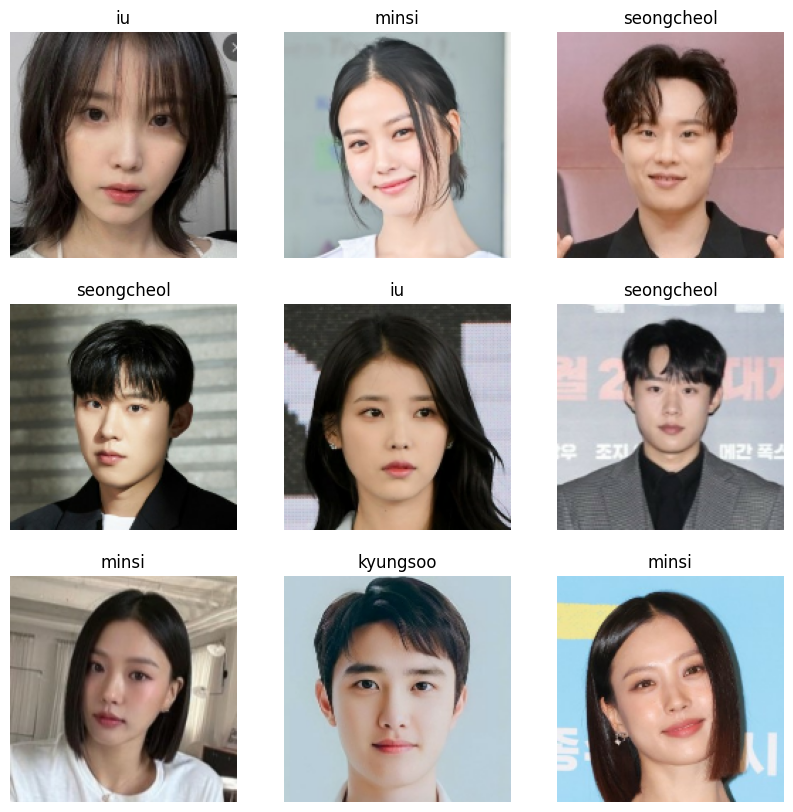

In [ ]:
# 라벨 확인하기

class_names = dataset.class_names   # 이미지 데이터셋에서 각 클래스의 이름을 리스트로

plt.figure(figsize=(10, 10))        # 새로운 그림 생성 10*10
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)     # 3*3 그리드에서 각 서브플롯 지정, i+1은 현재 인덱스
        plt.imshow(images[i].numpy().astype("uint8"))     # 텐서플로우 텐서를 배열로 변환, 이미지 데이터 타입을 uint8로 변환
        plt.title(class_names[labels[i]])                 # 이미지 타이틀에 클래스 이름 지정
        plt.axis("off")                                   # 축 제거

In [ ]:
# 배치 크기로 나누기

batches = tf.data.experimental.cardinality(dataset)   # 전체 배치 수
train_dataset = dataset.take(batches * 4 // 5)    # 전체 배치의 80%를 훈련 데이터로 사용
test_dataset = dataset.skip(batches * 4 // 5)     # 나머지 20%를 테스트 데이터로 사용

print(tf.data.experimental.cardinality(train_dataset))      #훈련 데이터 배치 수 출력
print(tf.data.experimental.cardinality(test_dataset))       #테스트 데이터 배치 수 출력

tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


In [ ]:
# 버퍼링된 프리페치로 I/O 차단 없이 디스크에서 이미지 로드(성능향상)

AUTOTUNE = tf.data.AUTOTUNE   # 최적의 데이터 배치 크기와 prefetch 버퍼 크기를 자동으로 조정

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)    # 버퍼 크기 자동 조정
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)      # 데이터 로딩을 비동기적으로

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


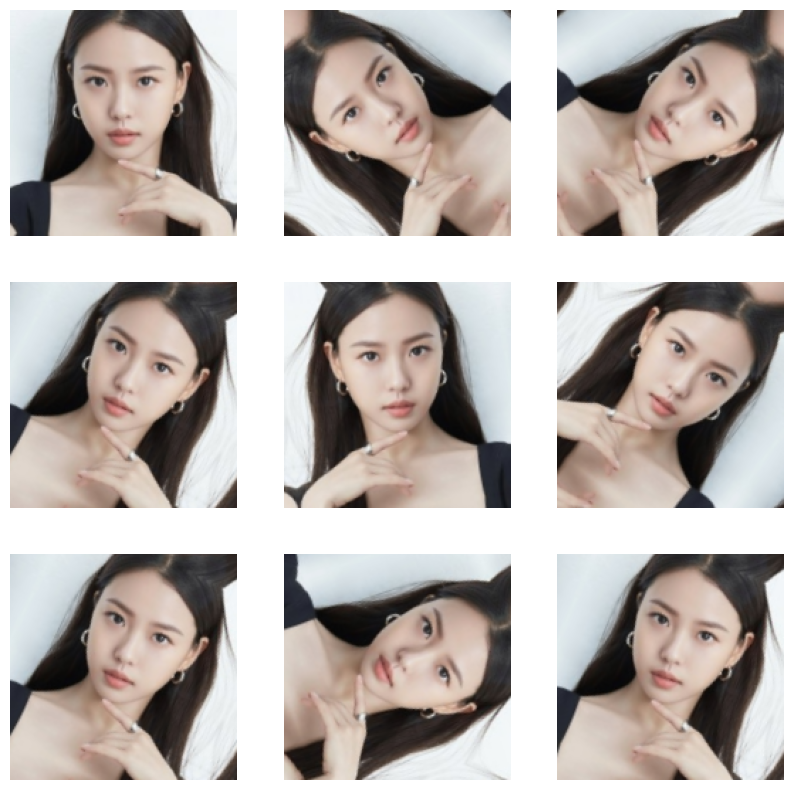

In [ ]:
# 데이터 증강 사용
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),  # 좌우 반전
    tf.keras.layers.RandomRotation(0.2),       # 랜덤 회전
])

# 데이터셋에서 첫번째 배치 가져와 증강된 이미지 시각화
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))      # 결과를 10*10 크기로 설정
    first_image = image[0]            # 첫번째 이미지 가져오기

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)     # 3*3 그리드에서 각 서브플롯 지정, i+1은 현재 인덱스
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)    # 증강된 이미지 시각화 (0과 1사이로 정규화)
        plt.axis('off')                         # 축 제거

In [ ]:
# 픽셀값 재조정 -1 ~ 1 의 값, 모델에 맞게 사용

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# 전이학습의 기본 모델 설정

IMG_SHAPE = (160, 160) + (3,)      # 이미지 크기 160*160, RGB 3
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_8[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [ ]:
# 베이스 모델로의 변환 확인

image_batch, label_batch = next(iter(train_dataset))      # 훈련 데이터셋에서 첫번째 배치 가져옴
feature_batch = base_model(image_batch)    # 기본 모델 사용해 feature 배치 추출
print(feature_batch.shape)    # feature 배치 형태 출력

(10, 5, 5, 1280)


In [ ]:
# 베이스 모델 학습 하지 않음

base_model.trainable = False

In [ ]:
# 베이스 모델 구조 확인

base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_8[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [ ]:
# 입력 이미지를 모델에 맞게 변환

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()   # 레이어 생성
feature_batch_average = global_average_layer(feature_batch)       # 평균 풀링? 수행 -> 데이터 축소 기법
print(feature_batch_average.shape)      # feature 배치 형태 출력

(10, 1280)


In [ ]:
# 모델의 출력부 확인

prediction_layer = tf.keras.layers.Dense(10)    # 10개의 유닛
prediction_batch = prediction_layer(feature_batch_average)      # 평균 풀링된 feature 배치를 입력으로 사용하여 예측
print(prediction_batch.shape)     # 예측 배치의 형태를 출력하여 형태 확인

(10, 10)


In [ ]:
# 모델 생성

inputs = tf.keras.Input(shape=(160, 160, 3))   # 입력 크기 160*160, RGB 3
x = data_augmentation(inputs)     # 데이터 증강 적용
x = preprocess_input(x)     # 전처리 함수 사용, 입력 이미지 변환
x = base_model(x, training=False)     # 추론 모드?
x = global_average_layer(x)           # 평균 풀링
x = tf.keras.layers.Dropout(0.2)(x)   # 20%의 뉴런을 랜덤으로 비활성화
outputs = prediction_layer(x)         # 최종 예측, 10개
model = tf.keras.Model(inputs, outputs)     # 모델 정의, 입출력 성정하여 모델 생성

In [ ]:
# 모델 컴파일

base_learning_rate = 0.0001   # 기본 학습률

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),     # 학습 속도 조절
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # 모델이 logits 형태일 때 사용
              metrics=['accuracy'])       # 모델의 정확도

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_10 (Sequential)  (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_3 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                           

In [ ]:
# 모델의 학습 가능 매개변수 확인

len(model.trainable_variables)

2

In [ ]:
initial_epochs = 30     # 초기 epochs 수 설정 (훈련 횟수)

In [ ]:
# 30 학습 후 결과

history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=test_dataset)

Epoch 1/30
9/9 [==============================] - 7s 173ms/step - loss: 3.1629 - accuracy: 0.0889 - val_loss: 2.8212 - val_accuracy: 0.0000e+00
Epoch 2/30
9/9 [==============================] - 1s 66ms/step - loss: 2.7002 - accuracy: 0.1111 - val_loss: 2.5491 - val_accuracy: 0.0345
Epoch 3/30
9/9 [==============================] - 1s 62ms/step - loss: 2.7081 - accuracy: 0.1556 - val_loss: 2.4178 - val_accuracy: 0.0345
Epoch 4/30
9/9 [==============================] - 1s 65ms/step - loss: 2.6770 - accuracy: 0.0778 - val_loss: 2.5321 - val_accuracy: 0.0690
Epoch 5/30
9/9 [==============================] - 1s 63ms/step - loss: 2.4483 - accuracy: 0.1333 - val_loss: 2.2194 - val_accuracy: 0.0345
Epoch 6/30
9/9 [==============================] - 1s 64ms/step - loss: 2.1576 - accuracy: 0.2000 - val_loss: 2.1373 - val_accuracy: 0.1379
Epoch 7/30
9/9 [==============================] - 1s 65ms/step - loss: 1.9980 - accuracy: 0.1889 - val_loss: 1.9517 - val_accuracy: 0.2759
Epoch 8/30
9/9 [======

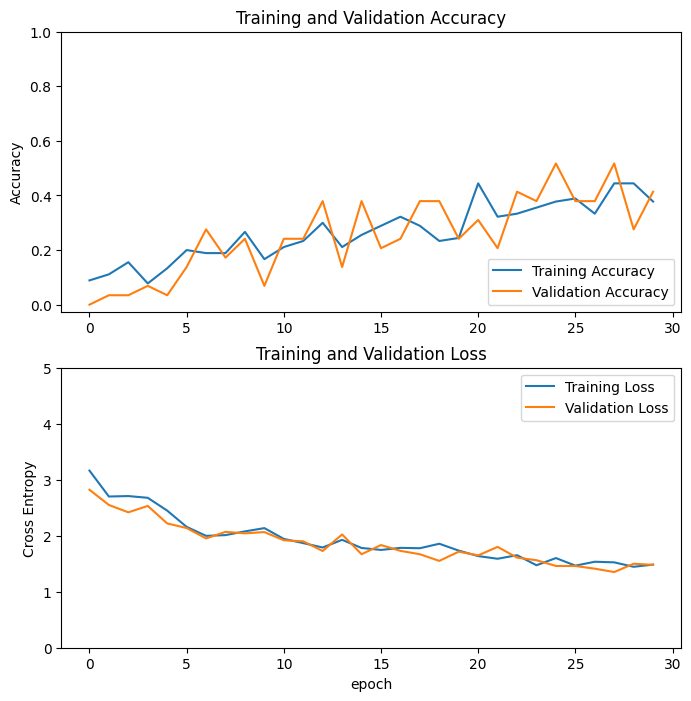

In [ ]:
acc = history.history['accuracy']     # 훈련 데이ㅌ에 대한 정확도
val_acc = history.history['val_accuracy']     # 검증 데이터에 대한 정확도

loss = history.history['loss']      # 훈련 데이터에 대한 손실
val_loss = history.history['val_loss']      # 검증 데이터에 대한 손실

plt.figure(figsize=(8, 8))      # 그래프 크리 8*8

plt.subplot(2, 1, 1)      # 2행 1열의 첫번째 그래프
plt.plot(acc, label='Training Accuracy')              # 훈련 데이터의 정확도 그래프
plt.plot(val_acc, label='Validation Accuracy')        # 검증 데이터의 정확도 그래프
plt.legend(loc='lower right')        # 그래프의 범례
plt.ylabel('Accuracy')      # y축 레이블
plt.ylim([min(plt.ylim()),1])     # y축의 범위 설정 (1 까지)
plt.title('Training and Validation Accuracy')     # 그래프 제목

plt.subplot(2, 1, 2)      # 2행 1열의 두번째 그래프
plt.plot(loss, label='Training Loss')           # 훈련 데이터의 손실 그래프
plt.plot(val_loss, label='Validation Loss')     # 검증 데이터의 손실 그래프
plt.legend(loc='upper right')     # 그래프의 범례
plt.ylabel('Cross Entropy')       # y축 레이블
plt.ylim([0, 5.0])        # y축의 범위 설정 (0~5까지)
plt.title('Training and Validation Loss')     # 그래프 제목
plt.xlabel('epoch')       # x축 레이블
plt.show()                # 그래프 출력

In [ ]:
# 모델 미세 조정
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))     # 레이어의 총 개수 출력

fine_tune_at = 100      # 미세 조정을 시작할 레이어의 인덱스 설정

# 미세 조정할 레이어 이후의 레이어부터 학습 가능
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


In [ ]:
# 컴파일 옵션 지정

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # 모델의 출력이 logits 일 때 사용
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),   # 기본 학습률보다 10배 작게 설정
              metrics=['accuracy'])     # 모델 성능평가

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_10 (Sequential)  (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_3 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                           

In [ ]:
# 학습 가능한 변수 확인

len(model.trainable_variables)

56

In [ ]:
fine_tune_epochs = 30     # 미세 조정 에포크 수 설정
total_epochs =  initial_epochs + fine_tune_epochs     # 초기 에포크 수 + 미세 조정 에포크 수

history_fine = model.fit(train_dataset,   # 훈련 데이터셋
                         epochs=total_epochs,   # 총 에포크 수
                         initial_epoch=history.epoch[-1],     # 이전 훈련의 마지막 에포크부터 계속 훈력
                         validation_data=test_dataset)        # 검증 데이터셋

Epoch 30/60
9/9 [==============================] - 10s 167ms/step - loss: 1.4860 - accuracy: 0.4222 - val_loss: 1.2467 - val_accuracy: 0.4828
Epoch 31/60
9/9 [==============================] - 1s 64ms/step - loss: 1.4104 - accuracy: 0.4444 - val_loss: 1.1209 - val_accuracy: 0.5862
Epoch 32/60
9/9 [==============================] - 1s 67ms/step - loss: 1.2834 - accuracy: 0.5222 - val_loss: 1.1690 - val_accuracy: 0.5862
Epoch 33/60
9/9 [==============================] - 1s 101ms/step - loss: 1.1395 - accuracy: 0.5222 - val_loss: 1.1392 - val_accuracy: 0.6897
Epoch 34/60
9/9 [==============================] - 1s 65ms/step - loss: 1.1126 - accuracy: 0.6222 - val_loss: 1.0043 - val_accuracy: 0.6552
Epoch 35/60
9/9 [==============================] - 1s 70ms/step - loss: 1.0126 - accuracy: 0.6778 - val_loss: 1.2192 - val_accuracy: 0.5172
Epoch 36/60
9/9 [==============================] - 1s 65ms/step - loss: 0.9868 - accuracy: 0.6556 - val_loss: 0.8145 - val_accuracy: 0.7241
Epoch 37/60
9/9 [

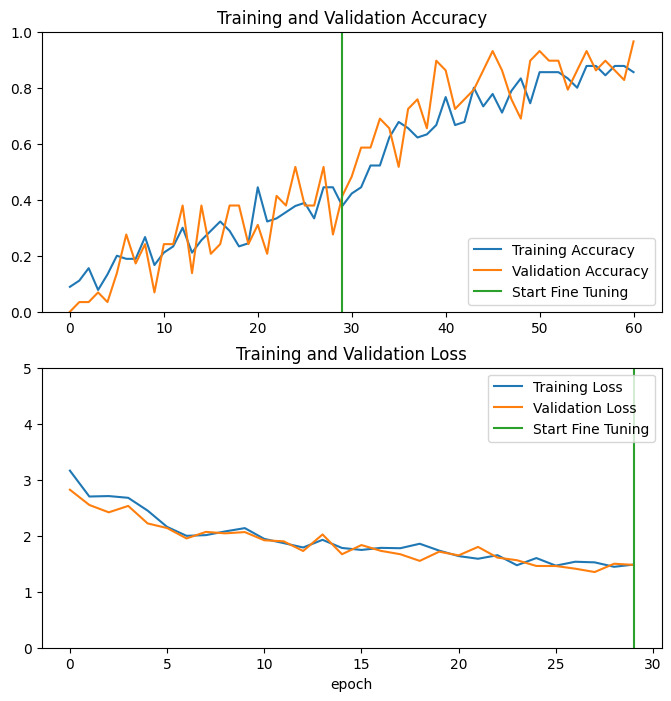

In [ ]:
acc += history_fine.history['accuracy']             # 훈련 데이터에 대한 정확도
val_acc += history_fine.history['val_accuracy']     # 검증 데이터에 대한 정확도

loss_list = []  # 손실값을 저장할 리스트
val_loss_list = []  # 검증 손실값을 저장할 리스트

loss_list.extend(history_fine.history['loss'])  # 훈련 데이터에 대한 손실 리스트에 추가
val_loss_list.extend(history_fine.history['val_loss'])  # 검증 데이터에 대한 손실 리스트에 추가

plt.figure(figsize=(8, 8))    # 그래프 크기 8*8
plt.subplot(2, 1, 1)          # 2행 1열의 첫번째 그래프
plt.plot(acc, label='Training Accuracy')          # 훈련 데이터 셋의 정확도 그래프
plt.plot(val_acc, label='Validation Accuracy')     # 검증 데이터 셋의 정확도 그래프
plt.ylim([0, 1])      # y축 범위 0 ~ 1
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')    # 미세 조정 시작점
plt.legend(loc='lower right')     # 그래프 범례
plt.title('Training and Validation Accuracy')     # 그래프 제목

plt.subplot(2, 1, 2)      # 2행 1열의 두번째 그래프
plt.plot(loss, label='Training Loss')       # 훈련 데이터 셋의 손실 그래프
plt.plot(val_loss, label='Validation Loss')     # 검증 데이터 셋의 손실 그래프
plt.ylim([0, 5.0])        # y축 범위 0 ~ 0.5
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')   # 미세 조정 시작점
plt.legend(loc='upper right')                     # 그래프 범례
plt.title('Training and Validation Loss')         # 그래프 제목
plt.xlabel('epoch')         # x축 레이블
plt.show()                  # 그래프 출력

In [ ]:
# 모델 미세 조정
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # 모델의 출력이 logits 일 때 사용
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),   # 기본 학습률보다 10배 작게 설정
              metrics=['accuracy'])     # 모델 성능평가

model.summary() # 모델 구조 확인

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_10 (Sequential)  (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLam  (None, 160, 160, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_3 (TFOpLa  (None, 160, 160, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                           

In [ ]:
len(model.trainable_variables)   # 모델의 학습 가능 변수 확인

56

In [ ]:
fine_tune_epochs = 30     # 미세 조정 에포크 수 설정
total_epochs =  initial_epochs + fine_tune_epochs     # 초기 에포크 수 + 미세 조정 에포크 수

history_fine = model.fit(train_dataset,           # 훈련 데이터셋
                         epochs=total_epochs,     # 총 에포크 수
                         initial_epoch=history.epoch[-1],     # 이전 훈련의 마지막 에포크부터 계속 훈력
                         validation_data=test_dataset)        # 검증 데이터셋

Epoch 30/60
9/9 [==============================] - 8s 165ms/step - loss: 0.3627 - accuracy: 0.8667 - val_loss: 0.3100 - val_accuracy: 0.9655
Epoch 31/60
9/9 [==============================] - 1s 105ms/step - loss: 0.3013 - accuracy: 0.9222 - val_loss: 0.1803 - val_accuracy: 0.9655
Epoch 32/60
9/9 [==============================] - 1s 71ms/step - loss: 0.2835 - accuracy: 0.9111 - val_loss: 0.1694 - val_accuracy: 0.9655
Epoch 33/60
9/9 [==============================] - 1s 66ms/step - loss: 0.3545 - accuracy: 0.8889 - val_loss: 0.2305 - val_accuracy: 0.9655
Epoch 34/60
9/9 [==============================] - 1s 66ms/step - loss: 0.2681 - accuracy: 0.9222 - val_loss: 0.2000 - val_accuracy: 0.9655
Epoch 35/60
9/9 [==============================] - 1s 103ms/step - loss: 0.2492 - accuracy: 0.9444 - val_loss: 0.2221 - val_accuracy: 0.9310
Epoch 36/60
9/9 [==============================] - 1s 85ms/step - loss: 0.2583 - accuracy: 0.9222 - val_loss: 0.1502 - val_accuracy: 1.0000
Epoch 37/60
9/9 [

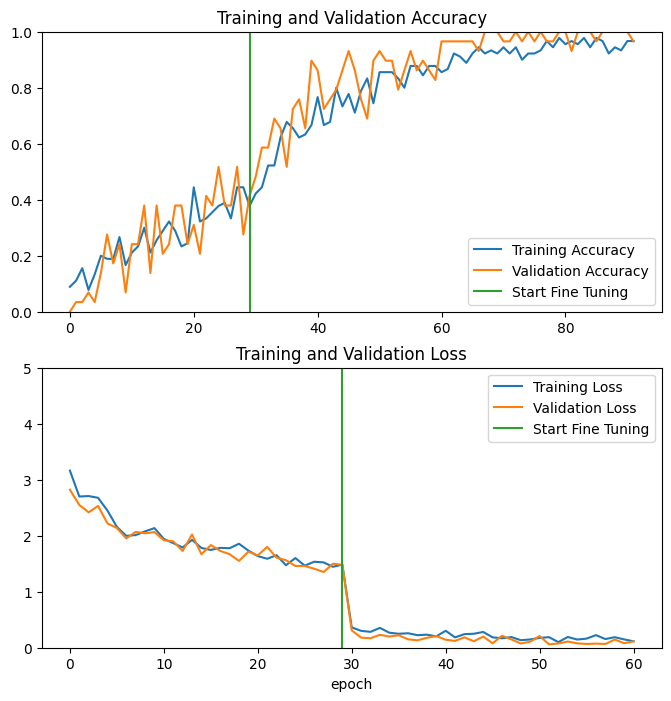

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))    # 그래프 크기 8*8
plt.subplot(2, 1, 1)          # 2행 1열의 첫번째 그래프
plt.plot(acc, label='Training Accuracy')          # 훈련 데이터 셋의 정확도 그래프
plt.plot(val_acc, label='Validation Accuracy')     # 검증 데이터 셋의 정확도 그래프
plt.ylim([0, 1])              # y축 범위 0 ~ 1
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')    # 미세 조정 시작점
plt.legend(loc='lower right')                       # 그래프 범례
plt.title('Training and Validation Accuracy')       # 그래프 제목

plt.subplot(2, 1, 2)                            # 2행 1열의 두번째 그래프
plt.plot(loss, label='Training Loss')           # 훈련 데이터 셋의 손실 그래프
plt.plot(val_loss, label='Validation Loss')     # 검증 데이터 셋의 손실 그래프
plt.ylim([0, 5.0])        # y축 범위 0 ~ 0.5
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')   # 미세 조정 시작점
plt.legend(loc='upper right')                     # 그래프 범례
plt.title('Training and Validation Loss')         # 그래프 제목
plt.xlabel('epoch')         # x축 레이블
plt.show()                  # 그래프 출력

In [ ]:
# 훈련, 테스트 데이터의 정확도 확인

loss, accuracy = model.evaluate(train_dataset)    # 훈련 데이터셋의 손실과 정확도 출력
print('Train accuracy :', accuracy)     # 정확도 출력

loss, accuracy = model.evaluate(test_dataset)     # 테스트 데이터셋의 손실과 정확도 출력
print('Test accuracy :', accuracy)      # 정확도 출력

9/9 [==============================] - 1s 27ms/step - loss: 0.0686 - accuracy: 0.9889
Train accuracy : 0.9888888597488403
3/3 [==============================] - 0s 16ms/step - loss: 0.0840 - accuracy: 0.9655
Test accuracy : 0.9655172228813171


1/1 [==============================] - 1s 764ms/step


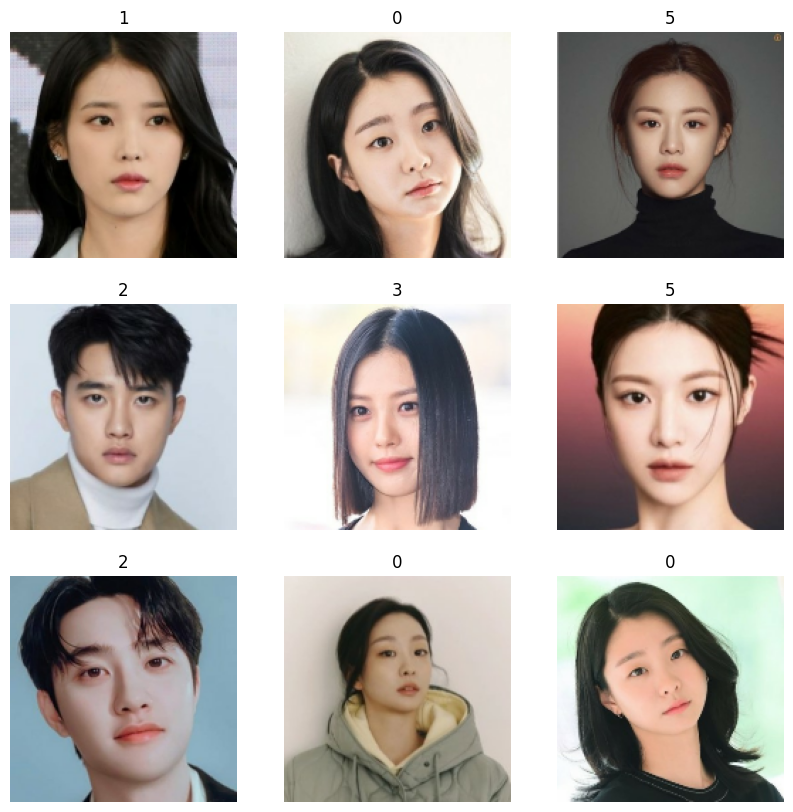

In [ ]:
# 락습한 모델의 예측 값 확인

image_batch, label_batch = test_dataset.as_numpy_iterator().next()     # 테스트 데이터셋에서 첫번째 배치 가져옴
predictions = model.predict(image_batch)    # 모델 예측

label = predictions.argmax(axis=1)

plt.figure(figsize=(10, 10))          # 결과를 10*10 크기로 설정
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)     # 3*3 그리드에서 각 서브플롯 지정, i+1은 현재 인덱스
    plt.imshow(image_batch[i].astype("uint8"))     # 텐서플로우 텐서를 배열로 변환, 이미지 데이터 타입을 uint8로 변환
    plt.title(label[i])
    plt.axis("off")